In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import numpy as np

In [3]:
mouse_data_to_load = "Resources/Mouse_metadata.csv"
Studies_data_to_load = "Resources/Study_results.csv"


In [4]:
mouse_data_df = pd.read_csv(mouse_data_to_load)
studies_data_df = pd.read_csv(Studies_data_to_load)

In [5]:
combined_data_df = pd.merge(mouse_data_df, studies_data_df, how='right', on='Mouse ID')

In [6]:
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
#how many mice
total_mice = combined_data_df['Mouse ID'].count()
total_mice

1893

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice_id = combined_data_df.loc[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mice_id

array(['g989'], dtype=object)

In [9]:
# Optional: Get all the data for the duplicate mouse ID

In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_dataframe_df = combined_data_df.drop_duplicates(subset=['Mouse ID'])
clean_dataframe_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [11]:
#Checking the number of mice in the clean DataFrame
cleaned_mice_count_dataframe = clean_dataframe_df['Mouse ID'].count()
cleaned_mice_count_dataframe

249

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
regimen_df = combined_data_df.groupby(['Drug Regimen'])

#mean
regimen_mean = regimen_df['Tumor Volume (mm3)'].mean()

#median
regimen_median = regimen_df['Tumor Volume (mm3)'].median()

#variance
regimen_variance = regimen_df['Tumor Volume (mm3)'].var()

#standard deviation
regimen_standard_deviation = regimen_df['Tumor Volume (mm3)'].std()

regimen_sem = regimen_df['Tumor Volume (mm3)'].sem()

In [13]:
summary_stats = pd.DataFrame({'Mean':regimen_mean, 'Median':regimen_median, 'Variance':regimen_variance, 'Standard Deviation':regimen_standard_deviation, 'SEM':regimen_sem})

summary_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
#count of mice for each drug
mouse_count = combined_data_df.groupby(['Drug Regimen']).count()['Mouse ID']
mouse_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

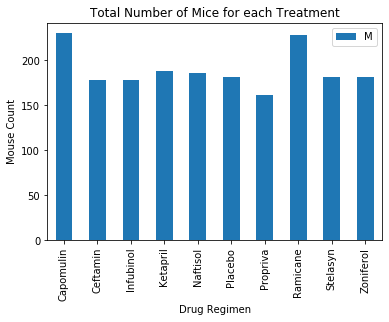

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_count.plot(kind='bar')
#plt.figure(figsize=(20,10))
plt.title('Total Number of Mice for each Treatment')
#plt.figure(figsize=(20,10))
plt.xlabel('Drug Regimen')
#plt.figure(figsize=(20,10))
plt.ylabel('Mouse Count')
#plt.figure(figsize=(20,10))
plt.legend('Mouse Count')

plt.show()
plt.tight_layout()

Text(0, 0.5, 'Mouse Count')

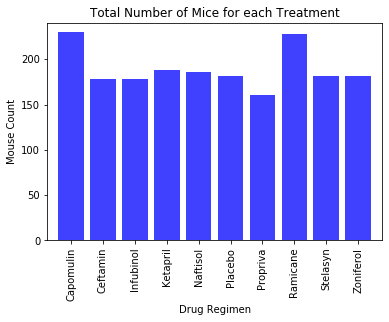

In [16]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
users = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
x_axis = np.arange(len(mouse_count))
plt.bar(x_axis, users, color='b', alpha=0.75, align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')
plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(users)+10)
plt.title('Total Number of Mice for each Treatment')
plt.xlabel('Drug Regimen')
#plt.figure(figsize=(20,10))
plt.ylabel('Mouse Count')


In [17]:
#defining gender df
gender_df = combined_data_df.groupby(['Mouse ID', 'Sex'])
gender_df

In [18]:
#Finding count and percentages of each sex for pieplot
mouse_gender_df = pd.DataFrame(gender_df.size())

#total count
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(['Sex']).count())
mouse_gender.columns = ['Total Count']

#percentage of female and male
mouse_gender['Percentage of Sex'] = (100*(mouse_gender['Total Count']/mouse_gender['Total Count'].sum()))

#percentage of gender
mouse_gender['Percentage of Sex'] = mouse_gender['Percentage of Sex']

mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


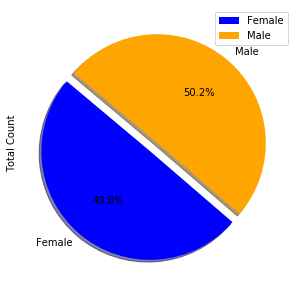

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['blue', 'orange']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count', figsize=(5,5), colors=('blue','orange'), startangle=140, explode = explode, shadow = True, autopct = "%1.1f%%")

In [20]:
#pie plot pyplot
#labels = ['gender']
labels =[combined_data_df['Sex'].unique()]
new = list(mouse_gender.index)
sizes = [49.799197,50.200803]
colors = ['blue', 'red']
explode = (0.1, 0)

([<matplotlib.patches.Wedge at 0x2beea3f99c8>,
 [Text(-0.7771287477781476, -0.9143691319028482, 'Female'),
  Text(0.7123680187966355, 0.8381717042442776, 'Male')],
 [Text(-0.4533251028705861, -0.5333819936099948, '49.8%'),
  Text(0.38856437388907383, 0.4571845659514241, '50.2%')])

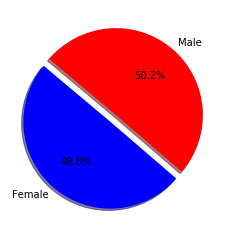

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sizes, explode=explode, labels=new, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=140)
#plt.axis("equal")
#plt.show()

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
most_common = combined_data_df[combined_data_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
most_common = most_common.sort_values(['Timepoint'], ascending=True)
most_common

most_common_df = most_common[['Drug Regimen', 'Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]

most_common_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [31]:


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

tumors = most_common_df['Tumor Volume (mm3)']
quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of most_common_df is: {lowerq}")
print(f"The upper quartile of most_common_df is: {upperq}")
print(f"The interquartile range of most_common_df is: {iqr}")
print(f"The the median of most_common_df is: {quartiles[0.5]} ")

 # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
   
    
    

    

The lower quartile of most_common_df is: 40.2201707875
The upper quartile of most_common_df is: 50.356470630000004
The interquartile range of most_common_df is: 10.136299842500001
The the median of most_common_df is: 45.0 
Values below 25.01572102375 could be outliers.
Values above 65.56092039375001 could be outliers.


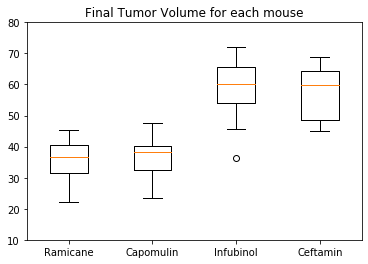

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
four_regimens = most_common_df.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
four_regimens.head()

four_regimens_df = four_regimens.to_frame()
four_regimens_df

top_4 = ['Ramicane', 'Capomulin', 'Infubinol','Ceftamin']

mouse_interest = four_regimens_df.reset_index()
tumor_lists = mouse_interest.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.title('Final Tumor Volume for each mouse')
plt.ylim(10, 80)
plt.show()

Text(0.5, 1.0, 'Timepoint Vs Tumor Volume')

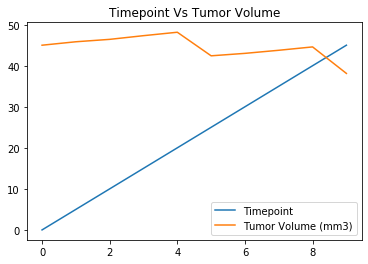

In [30]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_point_vs_tumor = combined_data_df[combined_data_df['Mouse ID'].isin(['j119'])]
time_point_vs_tumor

time_point_vs_tumor_data = time_point_vs_tumor[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
time_point_vs_tumor_data

line_plot = time_point_vs_tumor_data.reset_index()
line_plot

line_plot_df = line_plot[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
line_plot_df

lines = line_plot_df.plot.line()
plt.title('Timepoint Vs Tumor Volume')

Text(0.5, 1.0, 'Mouse Weight Vs Average Tumor Volume')

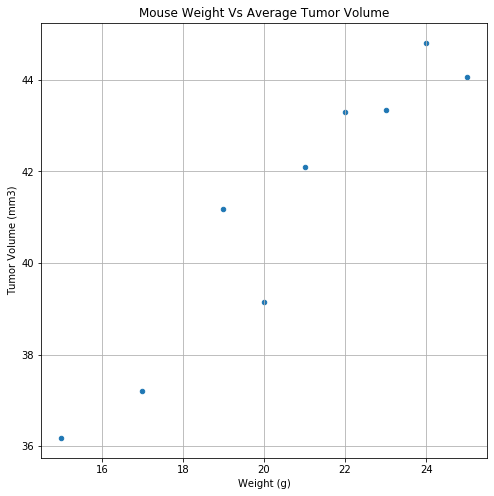

In [28]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df = combined_data_df[combined_data_df['Drug Regimen'].isin(['Capomulin'])]

capomulin_df_weight = most_common[['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']]

capomulin_sorting = capomulin_df_weight.sort_values(['Weight (g)'], ascending=True)

capomulin_plot = capomulin_df.reset_index()

capomulin_mouse_weight = capomulin_plot.groupby('Weight (g)')['Tumor Volume (mm3)'].mean()

capomulin_mouse_weight_plot = pd.DataFrame(capomulin_mouse_weight).reset_index()


capomulin_df_scatter = capomulin_mouse_weight_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid=True, figsize= (8,8))
plt.title("Mouse Weight Vs Average Tumor Volume")

The r-squared is: 0.9034966277438606


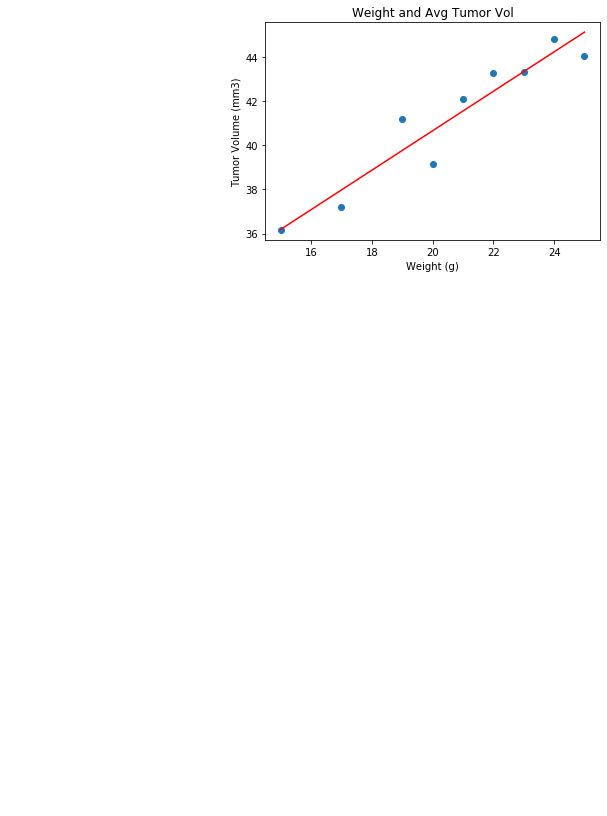

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_mouse_weight_plot['Weight (g)']
y_values = capomulin_mouse_weight_plot['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_value = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_value,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight and Avg Tumor Vol")
print(f"The r-squared is: {rvalue**2}")
plt.show()